In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

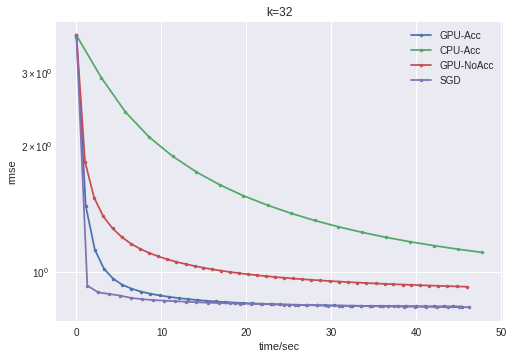

In [51]:
k = 32
sv_threshold = '10'
num_gram = 1
num = 0
dataset = 'ml-20m'

use_gpu = 'false'
accelerated = 'true'
soft_threshold = 'true'
filename = './%s/impute_%d_%d_%s_%s_%d_%s_%s.tsv' % (dataset, num, k, sv_threshold, soft_threshold, num_gram, use_gpu, accelerated)
df_cpu_acc = pd.read_csv(filename, sep='\t')

use_gpu = 'true'
accelerated = 'true'
soft_threshold = 'true'
filename = './%s/impute_%d_%d_%s_%s_%d_%s_%s.tsv' % (dataset, num, k, sv_threshold, soft_threshold, num_gram, use_gpu, accelerated)
df_gpu_acc = pd.read_csv(filename, sep='\t')

# use_gpu = 'true'
# accelerated = 'true'
# soft_threshold = 'false'
# filename = './%s/impute_%d_%d_%s_%s_%d_%s_%s.tsv' % (dataset, num, k, sv_threshold, soft_threshold, num_gram, use_gpu, accelerated)
# df_gpu_acc_hard = pd.read_csv(filename, sep='\t')

use_gpu = 'true'
accelerated = 'false'
soft_threshold = 'true'
filename = './%s/impute_%d_%d_%s_%s_%d_%s_%s.tsv' % (dataset, num, k, sv_threshold, soft_threshold, num_gram, use_gpu, accelerated)
df_gpu_noacc = pd.read_csv(filename, sep='\t')

# SGD.
filename = './%s/sgd_%d_%d.tsv' % (dataset, num, k)
df_sgd = pd.read_csv(filename, sep='\t')

plt.plot(df_gpu_acc['time'], df_gpu_acc['rmse'], label='GPU-Acc', marker='.')
plt.plot(df_cpu_acc['time'], df_cpu_acc['rmse'], label='CPU-Acc', marker='.')
plt.plot(df_gpu_noacc['time'], df_gpu_noacc['rmse'], label='GPU-NoAcc', marker='.')
plt.plot(df_sgd['time'], df_sgd['rmse'], label='SGD', marker='.')

# Very small difference between soft threshold and hard threshold.
#plt.plot(df_gpu_acc_hard['time'], np.log10(df_gpu_acc_hard['rmse']), label='GPU-Acc-Hard', marker='.')
plt.xlabel('time/sec')
plt.ylabel('rmse')
plt.yscale('log')
plt.title('k=%d' % k)
plt.legend()

fig = plt.gcf()
fig.savefig('plot1.png')
plt.show()


This doesn't look that great. SGD still seems the best!